#Investigate Some Factors Affecting Appointment Missing in Brazil 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, we try to anlyze a public health dataset provided originally from <a href="https://www.kaggle.com/joniarroba/noshowappointments">Kaggle</a>, recording the history of missing healthcare appointments for patients with various conditions. The dataset includes columns for various patient vital information, including Gender, Age and health conditions such as Hypertension, Diabetes and Alchoholism. It also includes Neighborhood and whether or not the patient is enrolled in the public welfare system in Brazil, called Bolsa Familia (called Scholarship in the dataset). It also includes the appointment date and the scheduling date, when the appointment was originally booked. Finally, the dataset also includes information on whether an SMS appointment message was recieved by the patiend or not.

> The analysis aims to get an insight into which factors play some role in making an appointment more susictible to be cancelled. This could be helpful in putting in some checks and measures to make sure such appointments are not going to be missed. In particular, we will try to find if there is any relationship between some patient vital and health conditions (Age, Hypertension, Diabestes and Alchoholism), the length of the duration between the scheduling day and the appointment day, the enrollment in public welfare systm,and the reciption of the SMS message on making an appointment more or less suciptible to be missed. 

<a id='wrangling'></a>
## Data Wrangling
> We start our analysis with data wrangling, as our data collection phase is already done. We start frist by checking the general properties in our dataset. 

### General Properties

> First, we import the necessary modules for our analysis

In [534]:
# We start by importing the necessary packages
import numpy as np
import pandas as pd
import seaborn as sbrn
import datetime
import matplotlib.pyplot as mplt
% matplotlib inline

UsageError: Line magic function `%` not found.


> We load the dataset and display the first few lines

In [555]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


> Find out the shape of the dataset

In [556]:
# this describe the shape of our data (i.e., columns and rows)
df.shape

(110527, 14)

> We have 14 columns and more than 110k records!.
The columns, in order, are:
>>1. The patient ID
>>2. The appointment ID
>>3. The patient gender
>>4. The day on which the appointment was made.
>>5. The day on which the appontment is going to occur.
>>6. The patient age
>>7. The neighborhood where the appointment is going to happen.
>>8. The patient status of whether or not he is enrolled in Bolsa Familia welfare program (We call it here 'Scholarship')
>>9. Whether the patient has hypertension or not.
>>10. Whether the patient has diabetes or not.
>>11. Whether the patient has alchoholism or not.
>>12. Whether the patient is handicaped or not (with 4 types of hanicap types)
>>13. Wehter the patient has gotten an appointment SMS or not
>>14. Wether the patient has missed the appointment or not.

>We look into the basic type of each column to get a feel on where we steer our data cleaning efforts

In [557]:
# This call gives us the basic datatpes in our dataframe, and how many non-null values each column has
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> We see that we do not have any missing values, which is good. 

> We will not be needing PatientId or AppointmentID, but we should check if there is any duplications before we drop these columns

In [558]:
# here we check how many duplicate records, based on the appointment ID
sum(df.AppointmentID.duplicated())

0

In [559]:
# here we check how many duplicate records, based on the patient ID
sum(df.PatientId.duplicated())

48228

> There seem to be multiple patients recoreds, but for different appointments. Lets see a histogram of patient ID's so that we know that no patient is dominating the whole dataset--This could be very, very unlikely, but just to be on the safe side :)

Text(0, 0.5, 'Number of Records')

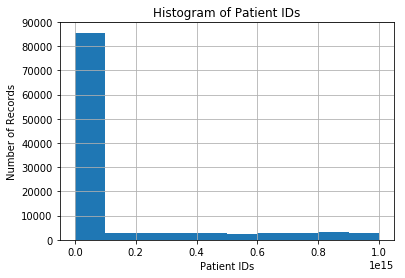

In [560]:
# this gives us the patient ID distribution in a histogram form
pp = df.PatientId.hist();
pp.set_title('Histogram of Patient IDs')
pp.set_xlabel('Patient IDs')
pp.set_ylabel('Number of Records')

> There seem to be a long skew to the right, with high concentration of ID's in the left. There could be a problem of one patient dominating the distribution. To role out this possiblity, let us find the maximum occurences for a single record of patient ID's.

In [561]:
# Here we get the maximum number of records for a single patient
max(df.PatientId.value_counts())

88

> 88 is not a huge number compared to 110k, so we are safe to drop the patient ID's. We will go ahead and drop both Appointment ID and Patient ID columns

In [564]:
# This drops the two columns for AppointmentID and PatientID and store these changes in the current dataframe
df.drop(['AppointmentID', 'PatientId'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [565]:
# This gives us the basic statistics for our dataframe
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> There are two problems that can be quickly noticed from the basic statistics:
>>1. The age has some wrong values (we have to clean it).
>>2. The stats for diabestes, alcoholism, handicap and scholarship are very minority in this dataset (means of each are less than 10%). We are not going to exclude them, as for example, handicapped people are typically a minority in a large dataset. However, we have to keep this in mind when drawing conclusions (i.e., we state that any conclusions based on observations on these small sub-populations are in fact from a small sub-sample in a large dataset, and futher investigation is necessary)

### Data Cleaning (Replace this with more specific notes!)
> We now start the process of data cleaning. First we have already checked before dropping some columns if there are any duplicate records, so we do not need that check again (in fact, we can get duplicate records given that the dropped columns for the patientID and appointmentID are the primary key in this original dataset).

> In addition, we can explicity check for missing values

In [566]:
# This shows how many duplicate records we have in our dataframe
sum(df.duplicated())

635

In [567]:
# This checks for any null value in our dataframe.
df.isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> So indeed we have duplicate values in the reduced dataset, but that is ok (since these are not duplicates in the original data set). In addition, we do not have missing values.

> Now, let us fix the age issue, by checking how many values are less than zero.
>>NOTE: We can think also of dropping Ages that are less than 1, but that might be wrong--given that an infant age can be actually below 1 year.

In [568]:
# Here we display all records that have an age below 0
df[df['Age'] < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


We see that only one recored is less than zero, so we can safely drop it.

In [569]:
# We can simply drop by the record number
df.drop(99832, inplace=True);

# Recheck to see if the deletion took care of all below-0-age records
df[df['Age'] < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


> Next we need to convert the AppointmentDay and ScheduledDay to appropriate data formats

In [570]:
# These calls changes the type of those columns from object to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [571]:
# Check the dataframe to make sure our changes took effect
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns, UTC]
AppointmentDay    110526 non-null datetime64[ns, UTC]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 11.0+ MB


> In addition, to be able to display gender and no-show in histograms and other statitical plots, we need to convert them to numbers

In [572]:
# Here we check what is the undelying gender type
type(df['Gender'][0])

str

In [573]:
# Change it to be integer so that it can be computed in statistics (for mean, std, ...)
# This is done by creating a helping dictionary (gend), that we use to replace the items in the column
gend = {'M': 1,'F': 2} 
df['Gender'] = [gend[item] for item in df.Gender]

In [574]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110526 non-null int64
ScheduledDay      110526 non-null datetime64[ns, UTC]
AppointmentDay    110526 non-null datetime64[ns, UTC]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: datetime64[ns, UTC](2), int64(8), object(2)
memory usage: 16.0+ MB


In [575]:
# Here we check the no-show column type
type(df['No-show'][0])

str

In [576]:
# Again we change it
# This is done by creating a helping dictionary (noshow), that we use to replace the items in the column
noshow = {'No': 0,'Yes': 1} 
df['No-show'] = [noshow[item] for item in df['No-show']]

In [577]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110526 non-null int64
ScheduledDay      110526 non-null datetime64[ns, UTC]
AppointmentDay    110526 non-null datetime64[ns, UTC]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null int64
dtypes: datetime64[ns, UTC](2), int64(9), object(1)
memory usage: 16.0+ MB


> Now, we can display a histogram of all columns we are dealing with

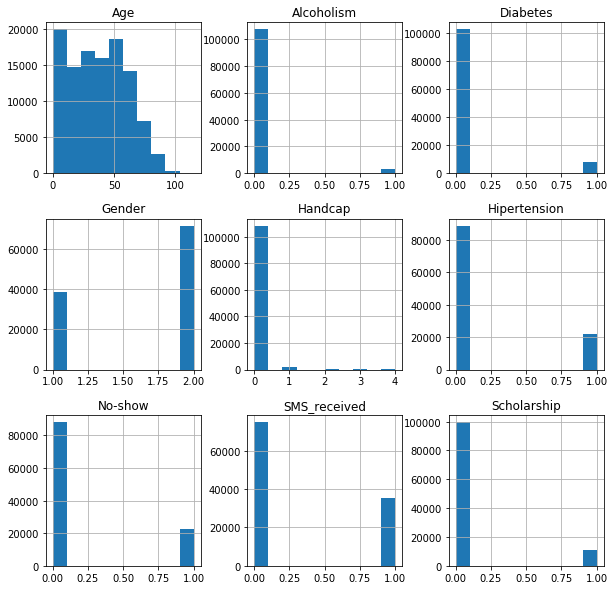

In [578]:
# Here we display histograms for all our dataframe columns
df.hist(figsize=(10,10));

> We see that there is a major problem with our dataset. It is biased twoards the show (i.e., no-show = 0) side. Thus, we need to normalize the data by the value count of no-show and show when looking for correlations.

> One column which cannot be displayed is the neighbourhood, as it cannot be directly converted into numerical values. However, we can try to find how many unique neighbourhoods we have.

In [579]:
# We check how many neighbourhood do we have by finding the number of unique values in the column
df['Neighbourhood'].nunique()

81

> We see that we have 81 unique neighborhood in our dataset. We can display a bar plot of them to have a look.

Text(0.5, 1.0, 'Disribution of Patient Appointment Records over Different Neighbourhoods')

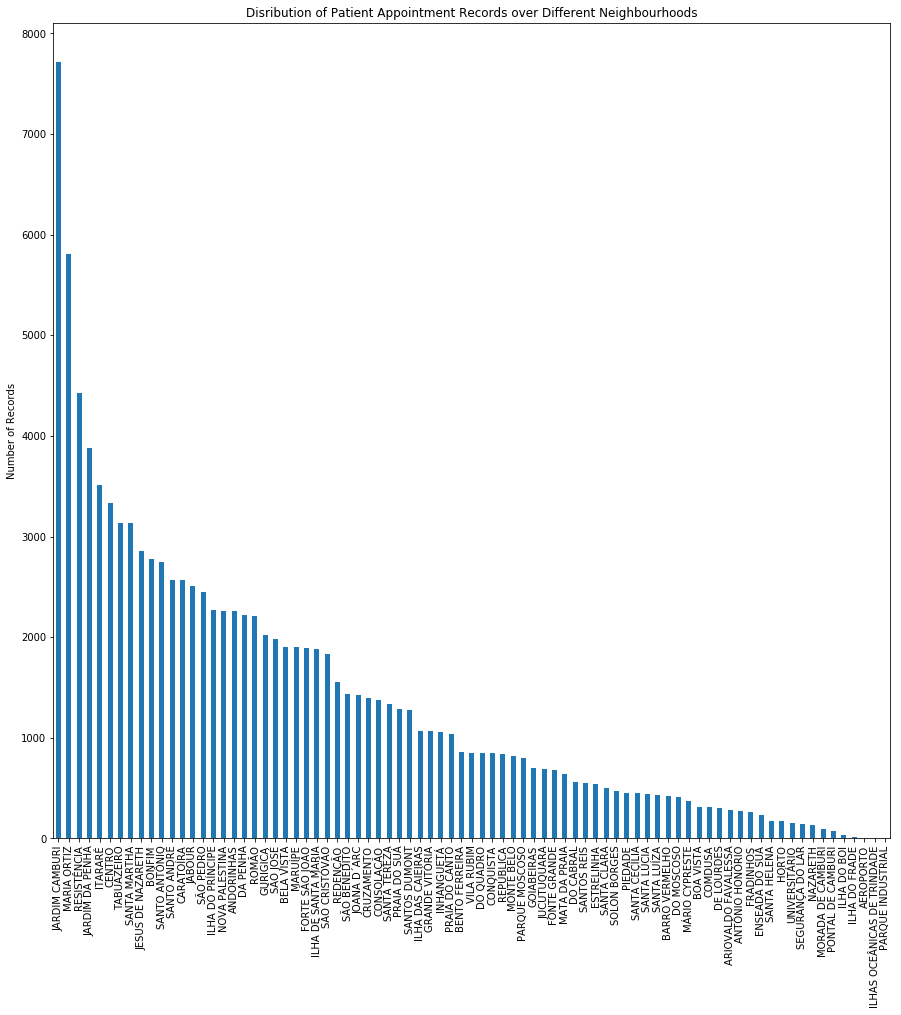

In [580]:
# Here we plot the values in a bar chart
plt = df['Neighbourhood'].value_counts().plot(kind='bar',figsize=(15,15));
plt.set_ylabel('Number of Records')
plt.set_title('Disribution of Patient Appointment Records over Different Neighbourhoods')

> We see that the data is scattered among these neighbourhoods, with Jardim Camburi having the most records (more than 7500 record)

> By now, the data is almost ready, and we are now ready for the exploration.

<a id='eda'></a>
## Exploratory Data Analysis

> We are going to explore the correlation between the below factors and the tendency of missing an appointment (i.e., having a no-show):
>> 1. The duration between the scheduling day and the appointment day
>> 2. The reciption of the appointment SMS message
>> 3. The enrollment in Bolsa Familia welfare program
>> 4. The health conditions (hypertension, alchoholism, diabetes)
>> 5. The age

> For this, we will split the dataset into two different sub-datasets, one for the records with show, and one for the records with no-show.

In [581]:
# Here we create a sub dataframe for all records with No-Show column = 0 
df_show = df[df['No-show'] == 0]
df_show.count()

Gender            88207
ScheduledDay      88207
AppointmentDay    88207
Age               88207
Neighbourhood     88207
Scholarship       88207
Hipertension      88207
Diabetes          88207
Alcoholism        88207
Handcap           88207
SMS_received      88207
No-show           88207
dtype: int64

In [582]:
# Here we create a sub dataframe for all records with No-Show column = 1 
df_noshow = df[df['No-show'] == 1]
df_noshow.count()

Gender            22319
ScheduledDay      22319
AppointmentDay    22319
Age               22319
Neighbourhood     22319
Scholarship       22319
Hipertension      22319
Diabetes          22319
Alcoholism        22319
Handcap           22319
SMS_received      22319
No-show           22319
dtype: int64

### Research Question 1: Does the Duration between the Scheduling Day and the Appointment Day Affects the Tendency to Miss an Appointment?

> For investigating this, we need to create a new column representing the difference between the scheduling day and the appointment day. We noticed that the AppointmentDay column has no hour, minute and second resolution, so we only subtract the days (as this is the only resolution we can have).

In [583]:
# -- Here we add a column to our dataframe, which equals the difference between the Appointment day and the Scheduling day
# -- The type of the column will be a timedelta type
# -- Since the AppointmentDay column in the original dataset has no hour/min/sec resolution, we only subtract days using 
#    the values.astype() functionality, which takes a string representing the format we want to get... 
df['ApptToSchedTime'] = df['AppointmentDay'].values.astype('<M8[D]') - df['ScheduledDay'].values.astype('<M8[D]')
df.describe()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ApptToSchedTime
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526
mean,1.649974,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.201934,10 days 04:24:39.789370
std,0.476980,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445,15 days 06:07:14.979140
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6 days +00:00:00
25%,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
50%,2.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4 days 00:00:00
75%,2.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15 days 00:00:00
max,2.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,179 days 00:00:00


> We see that the duration can be negative, which means that the our data have some problem. So, we will try to see how many records are having this issue

In [584]:
# Now we check how many records have negative numbers, by creating a timedelta object of size 0, to compare against...
td0 = datetime.timedelta(0)
df[df['ApptToSchedTime'] < td0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ApptToSchedTime
27033,1,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,1,-1 days
55226,2,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,1,-1 days
64175,2,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,1,-1 days
71533,2,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,1,-6 days
72362,1,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,1,-1 days


> We see that only five records, and in all of them the time difference is greater than 1 day, which does not make sense. So, we can safely drop them.

In [585]:
# We drop these records using their serial number
df.drop(27033, inplace=True);
df.drop(55226, inplace=True);
df.drop(64175, inplace=True);
df.drop(71533, inplace=True);
df.drop(72362, inplace=True);
df[df['ApptToSchedTime'] < td0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ApptToSchedTime


> Now we will display the mean and stadard deviation of the duration for each group.

In [586]:
# Now we check the summary stats of our new column, in the show subset of our dataframe
df_show = df[df['No-show'] == 0]
df_show['ApptToSchedTime'].describe()

count                      88207
mean      8 days 18:06:51.151042
std      14 days 13:12:38.918695
min              0 days 00:00:00
25%              0 days 00:00:00
50%              2 days 00:00:00
75%             12 days 00:00:00
max            179 days 00:00:00
Name: ApptToSchedTime, dtype: object

In [587]:
# Now we check the summary stats of our new column, in the no-show subset of our dataframe

df_noshow = df[df['No-show'] == 1]
df_noshow['ApptToSchedTime'].describe()

count                      22314
mean     15 days 20:03:05.856413
std      16 days 14:32:03.799276
min              0 days 00:00:00
25%              4 days 00:00:00
50%             11 days 00:00:00
75%             23 days 00:00:00
max            179 days 00:00:00
Name: ApptToSchedTime, dtype: object

> We clearly see that the mean value for the duration in the case of no-show is higher, as expected. In addition, to assure that our statistics are not skewed, we see that the standard deviation, minimum and maximum for both samples are very similar, which gives confidence to our hypothesis. We can visualize this difference nicely by histograms of the sample-size normalized data (which should sum up to the means).

sum of no-show durations =  15.835484449223976  days
sum of show durations    =  8.754758692619985  days


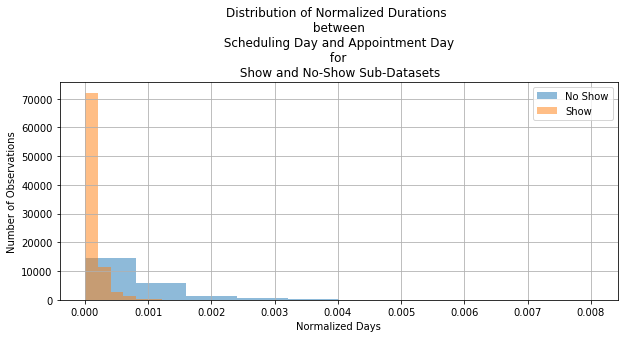

In [588]:
# Here we plot the histograms of each group, normalized to their count

# First we do the normailzation in a new series
# Note that we need to extract the days value from the timedelta object, to be able to normalize it...
df_noshow_normalized = df_noshow['ApptToSchedTime'].dt.days/df_noshow['ApptToSchedTime'].count()
df_show_normalized = df_show['ApptToSchedTime'].dt.days/df_show['ApptToSchedTime'].count()

# Then we plot it in a histogram format
pp = df_noshow_normalized.hist(alpha=0.5, label='No Show', figsize=(10,4));
df_show_normalized.hist(alpha=0.5, label='Show');
mplt.legend();
pp.set_xlabel('Normalized Days')
pp.set_ylabel('Number of Observations')
pp.set_title('Distribution of Normalized Durations \n between \n Scheduling Day and Appointment Day \n for \n Show and No-Show Sub-Datasets')
# Also, we plot the sum of the normalized values, which should be equal to the means if our calculation is right...
print('sum of no-show durations = ', sum(df_noshow_normalized), ' days')
print('sum of show durations    = ', sum(df_show_normalized), ' days')

> We can see that the 'no-show' distribution is wider and has a longer skew to the right than the 'show' distribution, showing that the duration between scheduling time and appointment time is tends to be longer for the no-show cases. We can also plot the overall normalized population distribution, and see how it differs from the 'show' and 'no-show' cases.

sum of all durations =  10.184345056597953  days
sum of show durations    =  8.754758692619985  days


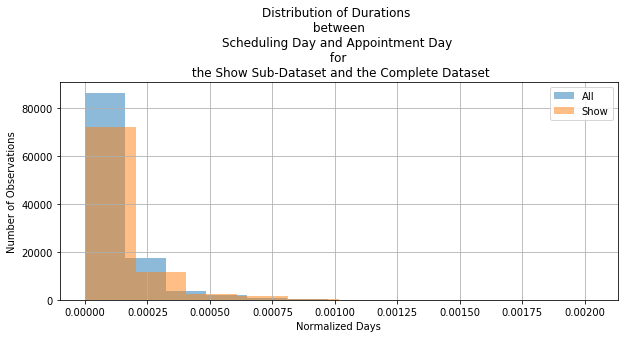

In [591]:
# Here we do the same process as above, but involving the show subset against the undivided (i.e, All) dataframe (for comparison)
df_show_normalized = df_show['ApptToSchedTime'].dt.days/df_show['ApptToSchedTime'].count()
df_normalized      = df['ApptToSchedTime'].dt.days / df['ApptToSchedTime'].count()
pp = df_normalized.hist(alpha=0.5, label='All', figsize=(10,4));
df_show_normalized.hist(alpha=0.5, label='Show');
mplt.legend();
pp.set_xlabel('Normalized Days')
pp.set_ylabel('Number of Observations')
pp.set_title('Distribution of Durations \n between \nScheduling Day and Appointment Day \n for \n the Show Sub-Dataset and the Complete Dataset')
print('sum of all durations = ', sum(df_normalized), ' days')
print('sum of show durations    = ', sum(df_show_normalized), ' days')

sum of all durations =  10.184345056597953  days
sum of no-show durations =  15.835484449223976  days


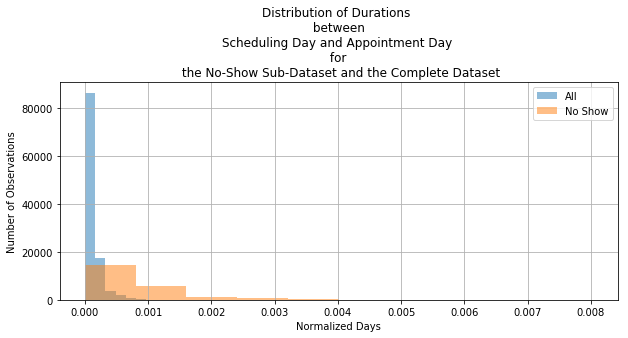

In [592]:
# Here we do the same process as above, but involving the no-show subset against the undivided (i.e, All) dataframe (for comparison)

df_noshow_normalized = df_noshow['ApptToSchedTime'].dt.days/df_noshow['ApptToSchedTime'].count()
df_normalized      = df['ApptToSchedTime'].dt.days/df['ApptToSchedTime'].count()
pp = df_normalized.hist(alpha=0.5, label='All', figsize=(10,4));
df_noshow_normalized.hist(alpha=0.5, label='No Show');
mplt.legend();
pp.set_xlabel('Normalized Days')
pp.set_ylabel('Number of Observations')
pp.set_title('Distribution of Durations \n between \nScheduling Day and Appointment Day \n for \n the No-Show Sub-Dataset and the Complete Dataset')
print('sum of all durations = ', sum(df_normalized), ' days')
print('sum of no-show durations = ', sum(df_noshow_normalized), ' days')

> We see that the overall population differs a little from the 'show'distribution, which means that the sample-size skew has no major impact on our results.

>However, another good way to assure that the sample-size skew has no major impact on our results is to repeat the above exercise, but now with a random sample of the 'show' distribution that is equal to the size of the 'no-show' sample se have.

mean of show random sample durations =  8 days 20:37:56.741059  days
mean of no-show durations =  15 days 20:03:05.856413  days


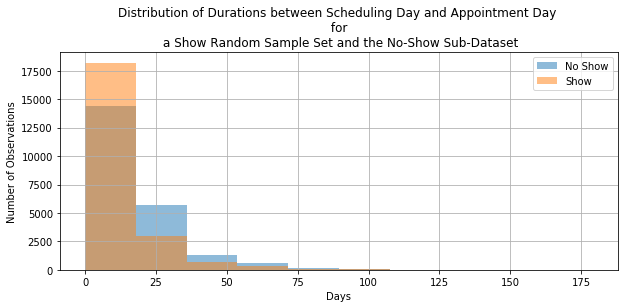

In [595]:
# Here we draw a random sample from the show subset, which equals to the size of the no-show subset
# For that, we use the sample() function, which takes the size of the sample, and the option to seed the random algorithm...
df_show_sample = df_show['ApptToSchedTime'].sample(n=df_noshow['ApptToSchedTime'].count(), random_state=1)

# Then we plot the show against no-show as before...
pp = df_noshow['ApptToSchedTime'].dt.days.hist(alpha=0.5, label='No Show', figsize=(10,4));
df_show_sample.dt.days.hist(alpha=0.5, label='Show', figsize=(10,4));
mplt.legend();
pp.set_xlabel('Days')
pp.set_ylabel('Number of Observations')
pp.set_title('Distribution of Durations between Scheduling Day and Appointment Day \n for \n a Show Random Sample Set and the No-Show Sub-Dataset')
print('mean of show random sample durations = ', df_show_sample.mean(), ' days')
print('mean of no-show durations = ', df_noshow['ApptToSchedTime'].mean(), ' days')

> We have plotted the histograms of durations here in absolute days, as no size-skew is present. The trend is the same as before, though the histogram is now more compact for the 'show', as the sample size is smaller, but the overall skew behavior is the same. Namely, the 'no-show' observations are more skewed to the right than the 'show' sample observations. In addition, the mean of the 'show' sample also re-assures our earlier results, that the larger the period between the scheduling day and the appointment day, the more suciptible the appointment to be missed. This is more apparent from the mean but 

### Research Question 2: Does the Reciption of the Appointment SMS Message Reduces the Tendency to Miss an Appointment?

> Intuitively, one would think that there should be a negative correlation between recieving an appointment SMS message and the tendencey to miss the appointment. We are going to explore if this intuition holds in our dataset. 

>Again, we are going to use the sub-divided dataframes for show and no-show. We can tell if this is the case by simple checking the mean of SMS reciption in each case.

In [441]:
# Here we compute and display the mean of each subset...
print('SMS-Reciption Mean for Show    Cases = ', df_show['SMS_received'].mean())
print('SMS-Reciption Mean for No-Show Cases = ', df_noshow['SMS_received'].mean())

SMS-Reciption Mean for Show    Cases =  0.29133742220005215
SMS-Reciption Mean for No-Show Cases =  0.43846912252397596


> Surprising enough, the mean of SMS reciption in the no-show cases is higher that that of the show cases, which contradicts any negative correlation between recieving an appointment SMS message and the tendencey to miss the appointment. 

> To visualize this results, we can plot the SMS reciption and no-reciption proportions for each case.

SMS-Reciption Mean for Show Random Sample Cases =  0.29062471990678496


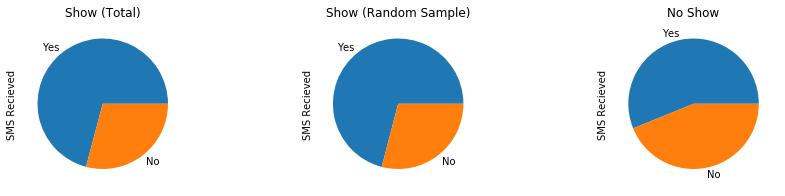

In [487]:
# Here we plot the proportion (in pie format) of the show (total), show (random sample), and no-show groups.
# We use the subplot functionality in matplotlib

# Here we draw a sample
df_show_sample = df_show['SMS_received'].sample(n=df_noshow['SMS_received'].count(), random_state=1)

# Define our labels
labels = 'Yes', 'No'

# Then create a 1x3 plot
fig, axs = mplt.subplots(1, 3, figsize=(15, 3), sharey=True, sharex=True)

# Then plot each group
axs[0].pie(df_show['SMS_received'].value_counts(), labels=labels)
axs[0].set_title('Show (Total)')
axs[0].set_ylabel('SMS Recieved')
axs[1].pie(df_show_sample.value_counts(), labels=labels)
axs[1].set_title('Show (Random Sample)')
axs[1].set_ylabel('SMS Recieved')
axs[2].pie(df_noshow['SMS_received'].value_counts(), labels=labels)
axs[2].set_title('No Show')
axs[2].set_ylabel('SMS Recieved')

# We also print the mean of the random 'Show' sample, for comparison against the total 'Show' population mean...
print('SMS-Reciption Mean for Show Random Sample Cases = ', df_show_sample.mean())

> The pie charts re-assures what we anticipated from the means, that there is no negative correlation between recieving an SMS and the tendency to miss an appointment. This is shown for both a the full 'show' sub-dataset, and for a smaller random sample of a size equal to the size of the 'no-show' samlple size.

### Research Question 3: Does the Enrollment in Bolsa Familia Affects the Tendency to Miss an Appointment?

> Here we want to explore any possible correlation between the enrollment in Bolsa Familia and the tendency to miss an appointment. We start first by a look at the means.

In [451]:
# Here we compute and display the mean of each subset...
print('Bolsa Familia Enrollment Mean for Show    Cases = ', df_show['Scholarship'].mean())
print('Bolsa Familia Enrollment Mean for No-Show Cases = ', df_noshow['Scholarship'].mean())

Bolsa Familia Enrollment Mean for Show    Cases =  0.09390411191855522
Bolsa Familia Enrollment Mean for No-Show Cases =  0.11553284933225777


> From the means, there seems to be no clear correlation between the enrollment in Bolsa Familia and the tendency to miss an appointment. We can visualize this as we did in the SMS-reciption case, and double check that this holds for a random sample from the 'show' population.

Scholarship Mean for Show Random Sample Cases =  0.09693465985479968


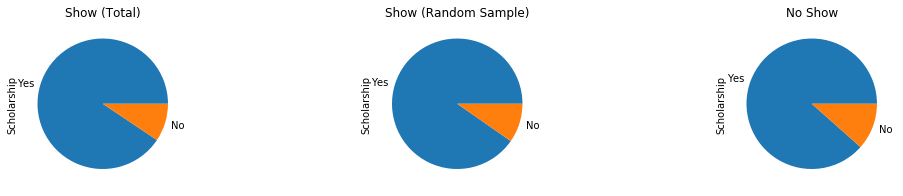

In [489]:
# Here we plot the proportion (in pie format) of the show (total), show (random sample), and no-show groups.
# We use the subplot functionality in matplotlib

# Here we draw a sample
df_show_sample = df_show['Scholarship'].sample(n=df_noshow['Scholarship'].count(), random_state=1)

# Define our labels
labels = 'Yes', 'No'

# Then plot...
fig, axs = mplt.subplots(1, 3, figsize=(18, 3), sharey=True, sharex=True)
axs[0].pie(df_show['Scholarship'].value_counts(), labels=labels)
axs[0].set_title('Show (Total)')
axs[0].set_ylabel('Scholarship')
axs[1].pie(df_show_sample.value_counts(), labels=labels)
axs[1].set_title('Show (Random Sample)')
axs[1].set_ylabel('Scholarship')
axs[2].pie(df_noshow['Scholarship'].value_counts(), labels=labels)
axs[2].set_title('No Show')
axs[2].set_ylabel('Scholarship')

# Finally compute the mean of the random sample, for comparison
print('Scholarship Mean for Show Random Sample Cases = ', df_show_sample.mean())

> Again, the pie charts re-assures that there is no strong correlation between the enrollment in Bolsa Familia and the tendency to miss an appointment

### Research Question 4: Are Patients with Hypertension, Alchoholism, or Diabetes Have Higher Tendency to Miss an Appointment?

> Here we want to explore whether a patient with hypertension, alchoholism, or diabetes is more suciptible to miss an appointment?  We again start first by a look at the means.

In [490]:
# Display the means of each group
print('The mean of patients with hypertension for the Show    Cases = ', df_show['Hipertension'].mean())
print('The mean of patients with hypertension for the No-Show Cases = ', df_noshow['Hipertension'].mean())

The mean of patients with hypertension for the Show    Cases =  0.20439420907637715
The mean of patients with hypertension for the No-Show Cases =  0.16904185713005287


In [491]:
# Display the means of each group
print('The mean of patients with diabetes for the Show    Cases = ', df_show['Diabetes'].mean())
print('The mean of patients with diabetes for the No-Show Cases = ', df_noshow['Diabetes'].mean())

The mean of patients with diabetes for the Show    Cases =  0.07383767728184838
The mean of patients with diabetes for the No-Show Cases =  0.06408532759702429


In [492]:
# Display the means of each group
print('The mean of patients with alchoholism for the Show    Cases = ', df_show['Alcoholism'].mean())
print('The mean of patients with alchoholism for the No-Show Cases = ', df_noshow['Alcoholism'].mean())

The mean of patients with alchoholism for the Show    Cases =  0.03041708707925675
The mean of patients with alchoholism for the No-Show Cases =  0.030339697051178633


> The means above does not suggest any significant correlation between hypertension, alchoholism or diabetes and having a tendency to miss an appointment, though with hypertension, the mean for 'show' cases is slightly higher. We can double check this by repeating the calculation for a random sample of the no-show sample size. We do this below, and we visualize all the above general conclusions about the correlation between thses health issues and the tendency to miss an appointment.

Hipertension Mean for Show Random Sample Cases =  0.20691045980102177


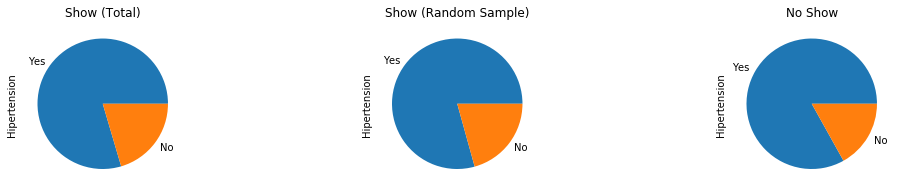

In [493]:
# Perform similar steps to the SMS-Reciption and Bolsa Familia plotting exercise 
# (draw random sample, then plot, then display the mean of the random sample)
df_show_sample = df_show['Hipertension'].sample(n=df_noshow['Hipertension'].count(), random_state=1)
labels = 'Yes', 'No'
fig, axs = mplt.subplots(1, 3, figsize=(18, 3), sharey=True, sharex=True)
axs[0].pie(df_show['Hipertension'].value_counts(), labels=labels)
axs[0].set_title('Show (Total)')
axs[0].set_ylabel('Hipertension')
axs[1].pie(df_show_sample.value_counts(), labels=labels)
axs[1].set_title('Show (Random Sample)')
axs[1].set_ylabel('Hipertension')
axs[2].pie(df_noshow['Hipertension'].value_counts(), labels=labels)
axs[2].set_title('No Show')
axs[2].set_ylabel('Hipertension')
print('Hipertension Mean for Show Random Sample Cases = ', df_show_sample.mean())

Hipertension Mean for Show Random Sample Cases =  0.07268979116249888


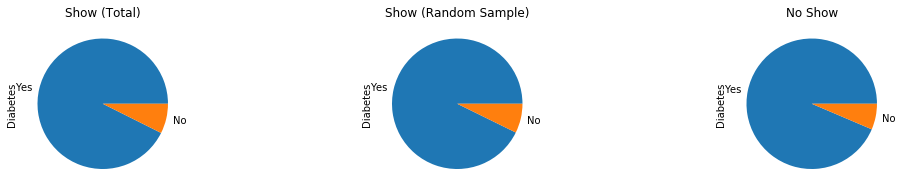

In [494]:
# Perform similar steps to the SMS-Reciption and Bolsa Familia plotting exercise 
# (draw random sample, then plot, then display the mean of the random sample)

df_show_sample = df_show['Diabetes'].sample(n=df_noshow['Diabetes'].count(), random_state=1)
labels = 'Yes', 'No'
fig, axs = mplt.subplots(1, 3, figsize=(18, 3), sharey=True, sharex=True)
axs[0].pie(df_show['Diabetes'].value_counts(), labels=labels)
axs[0].set_title('Show (Total)')
axs[0].set_ylabel('Diabetes')
axs[1].pie(df_show_sample.value_counts(), labels=labels)
axs[1].set_title('Show (Random Sample)')
axs[1].set_ylabel('Diabetes')
axs[2].pie(df_noshow['Diabetes'].value_counts(), labels=labels)
axs[2].set_title('No Show')
axs[2].set_ylabel('Diabetes')
print('Diabetes Mean for Show Random Sample Cases = ', df_show_sample.mean())

Hipertension Mean for Show Random Sample Cases =  0.03159451465447701


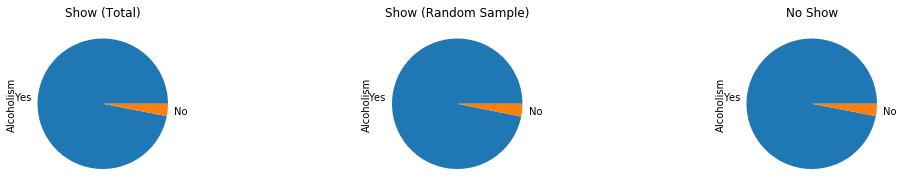

In [495]:
# Perform similar steps to the SMS-Reciption and Bolsa Familia plotting exercise 
# (draw random sample, then plot, then display the mean of the random sample)
df_show_sample = df_show['Alcoholism'].sample(n=df_noshow['Alcoholism'].count(), random_state=1)
labels = 'Yes', 'No'
fig, axs = mplt.subplots(1, 3, figsize=(18, 3), sharey=True, sharex=True)
axs[0].pie(df_show['Alcoholism'].value_counts(), labels=labels)
axs[0].set_title('Show (Total)')
axs[0].set_ylabel('Alcoholism')
axs[1].pie(df_show_sample.value_counts(), labels=labels)
axs[1].set_title('Show (Random Sample)')
axs[1].set_ylabel('Alcoholism')
axs[2].pie(df_noshow['Alcoholism'].value_counts(), labels=labels)
axs[2].set_title('No Show')
axs[2].set_ylabel('Alcoholism')
print('Alcoholism Mean for Show Random Sample Cases = ', df_show_sample.mean())

### Research Question 5: Does the Patient Age Affects the Tendency to Miss an Appointment?

> Here we want to explore any possible correlation between the patient's age and his tendency to miss an appointment. We start first by a look at the means.

In [496]:
# This prints the mean age for each group...
print('The mean of patients age for the Show    Cases = ', df_show['Age'].mean())
print('The mean of patients age for the No-Show Cases = ', df_noshow['Age'].mean())

The mean of patients age for the Show    Cases =  37.790504154999034
The mean of patients age for the No-Show Cases =  34.31787218786412


> The means does not show a major difference between the two cases, though the show cases tends to have a higher age, as one would expect elderly people to care more about their health. We can have a look at the histograms of both cases to see if there is any interesting pattern.

sum of show normalized patient ages    =  37.790504155005614  years
sum of no show normalized patient ages =  34.3178721878611  years


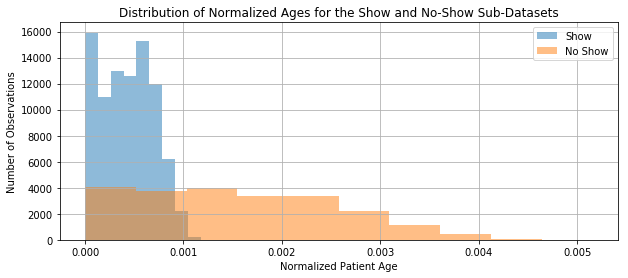

In [596]:
# We normalize the age by the count
df_show_normalized  = df_show['Age']/df_show['Age'].count()
df_noshow_normalized = df_noshow['Age']/df_noshow['Age'].count()

# The plot the distribution as histograms
pp = df_show_normalized.hist(alpha=0.5, label='Show', figsize=(10,4));
df_noshow_normalized.hist(alpha=0.5, label='No Show');
mplt.legend();
pp.set_xlabel('Normalized Patient Age')
pp.set_ylabel('Number of Observations')
pp.set_title('Distribution of Normalized Ages for the Show and No-Show Sub-Datasets')
print('sum of show normalized patient ages    = ', sum(df_show_normalized), ' years')
print('sum of no show normalized patient ages = ', sum(df_noshow_normalized), ' years')

> We see from the histograms that the patients with older ages are infact more suciptible to miss an appointment. However, this could be an effect of the normalization we did and the skew in the sample sizes. To reassure our analysis, we repeat the above exercise, but with a random sample of the 'show' cases, that has a similar size to the 'no-show' sample.

Mean of show random sample patient ages    =  37.84399928296137  years


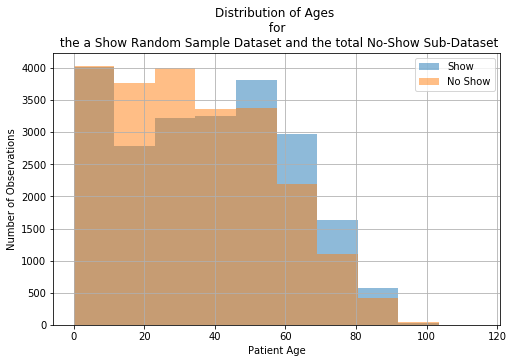

In [598]:
# We first draw a sample from the 'Show' subset, with size equal to the 'No-Show' subset
df_show_sample = df_show['Age'].sample(n=df_noshow['Age'].count(), random_state=1)

# Then we plot the distributions
pp = df_show_sample.hist(alpha=0.5, label='Show', figsize=(8,5));
df_noshow['Age'].hist(alpha=0.5, label='No Show');
mplt.legend();
pp.set_xlabel('Patient Age')
pp.set_ylabel('Number of Observations')
pp.set_title('Distribution of Ages \n for \n the a Show Random Sample Dataset and the total No-Show Sub-Dataset')
print('Mean of show random sample patient ages    = ', df_show_sample.mean(), ' years')

> The comparison of two 'show' and 'no-show' samples with the same size did actually revealed that our earlier results using age normalization was not actually correct, and it was skewed due to the sample size! 
> Here, we see clearly that the age effect is not very critical, though patient with younger ages seem to have more 'no-show' tendency as the 'no-show' histogram is more skewed to the left than the 'show' histogram in the above figure.

<a id='conclusions'></a>
## Conclusions

> In this project, we used a public health dataset from Brazil to investigated the possible correlation between the below factors and the tendency of missing an appointment (i.e., having a no-show):
>> 1. The duration between the scheduling day and the appointment day
>> 2. The reciption of the appointment SMS message
>> 3. The enrollment in Bolsa Familia welfare program
>> 4. The health conditions (hypertension, alchoholism, diabetes)
>> 5. The age

> There are several limitaitons in this analysis. Some limitations are:
>>1. The given dataset has a strong skew towards the 'show' cases, which represents more than 70% of the total dataset size. Thus we tried to mitigate this skew when possible by normalization or selecting a random sample from the 'show' population with a similar size of the 'no-show' population. However, there could be better approaches to handle this.
>>2. The given dataset has some records with issues in their entries. For example, several entries has negative age, which we had to drop and exclude from our analysis.
>>3. Another limitation is missing hour/minute portion of the Appointment days, for which we had to exclude these data from our duration calculation, though the scheduling day column has it. There could be a other approaches to handle this, such as taking the mid working day (i.e., the mean) to fill in the missing hour/minute values in the Appointment records.

> Based on our analysis, the following conclusions have been made:
>>1. There seems to be a positive correlation between the length of the duration between the scheduling day and the appointment day and the tendency to miss an appointment.
>>2. No clear negative correlation was found between receiving an SMS appointment message and the tendency to miss an appointment.
>>3. There was no evidence of clear correlation between the enrollment in Bolsa Familia welfare program and the tendency to miss an appointment.
>>4. No clear correlation was found between health conditions (hypertension, alchoholism, diabetes) and the tendency to miss an appointment.
>>5. There was no evidence of strong correlation between the age and the tendency to miss an appointment. However, a comparison of two samples of the same size of 'show' and 'no-show' populations suggets a slight tendency to miss an appointment for younger age patients. 

>Further investigations could be made to find more correlations that increase or decrease the tendency to miss an appointment. This could include factors not covered in this study, or combination of factors (e.g., alcoholism with hypertension, or age with SMS-reciption ...etc).